In [28]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
parent_dir="/home/pranay5255/Desktop/Price_action_data_hourly/"
paFolder_files=os.listdir(parent_dir)

In [4]:
paFolder_files

['2022', '2019', '2018', '2021', '2020', '2023']

In [24]:
price_feed1=pd.read_csv("/home/pranay5255/Desktop/Price_action_data_hourly/2022/BTC_hourly_PA.csv")

price_feed2=pd.read_csv("/home/pranay5255/Desktop/Price_action_data_hourly/2022/AAVEUSDT_1h_PA.csv")

In [9]:
price_feed2

,Unnamed: 0,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,0,2022-01-01 00:00:00,46216.93,46731.39,46208.37,46656.13,1503.33095,2022-01-01 00:59:59.999,6.987999e+07,38608,806.06536,3.746216e+07,0
1,1,2022-01-01 01:00:00,46656.14,46949.99,46574.06,46778.14,943.81539,2022-01-01 01:59:59.999,4.412715e+07,31872,491.18067,2.296327e+07,0
2,2,2022-01-01 02:00:00,46778.14,46928.94,46721.96,46811.77,485.16860,2022-01-01 02:59:59.999,2.272067e+07,24364,206.35113,9.662607e+06,0
3,3,2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,2022-01-01 03:59:59.999,2.636326e+07,19882,248.28212,1.162938e+07,0
4,4,2022-01-01 04:00:00,46813.21,46887.33,46591.23,46711.05,861.88389,2022-01-01 04:59:59.999,4.027204e+07,23357,397.53563,1.857540e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,273,2022-12-31 20:00:00,16570.14,16574.97,16564.09,16568.60,2622.14355,2022-12-31 20:59:59.999,4.344849e+07,90705,1311.38111,2.172951e+07,0
8774,274,2022-12-31 21:00:00,16568.19,16571.64,16544.12,16548.28,3618.77389,2022-12-31 21:59:59.999,5.992803e+07,105065,1746.41338,2.892190e+07,0
8775,275,2022-12-31 22:00:00,16548.28,16567.49,16470.00,16520.81,6695.13625,2022-12-31 22:59:59.999,1.106669e+08,153933,3119.95813,5.157153e+07,0
8776,276,2022-12-31 23:00:00,16520.28,16551.24,16487.74,16542.40,4973.43307,2022-12-31 23:59:59.999,8.217183e+07,152632,2451.02335,4.049638e+07,0


In [23]:
def correlation_module(price_feed1,price_feed2):

    r = np.corrcoef(price_feed1['close'],price_feed2['close'])[0,1]

    # Plot the correlation
    plt.figure(figsize=(15,10))
    sns.scatterplot(x = price_feed1['close'], y = price_feed2['close'])

    plt.title("Correlation of x and y")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

    # Print the correlation coefficient
    print(r)



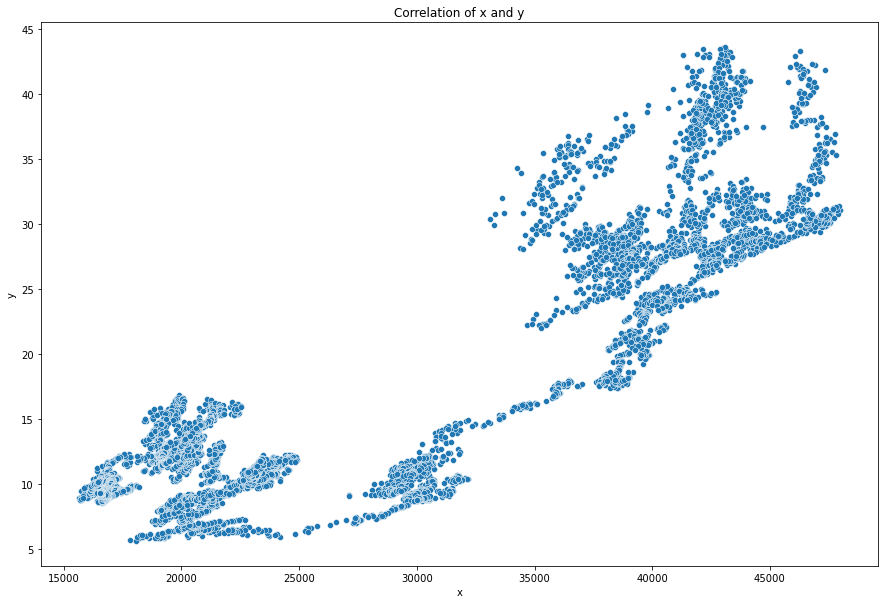

0.8771853675781535


In [29]:
price_feed1=pd.read_csv("/home/pranay5255/Desktop/Price_action_data_hourly/2022/BTC_hourly_PA.csv")

price_feed2=pd.read_csv("/home/pranay5255/Desktop/Price_action_data_hourly/2022/ATOMUSDT_1h_PA.csv")

correlation_module(price_feed1=price_feed1,price_feed2=price_feed2)

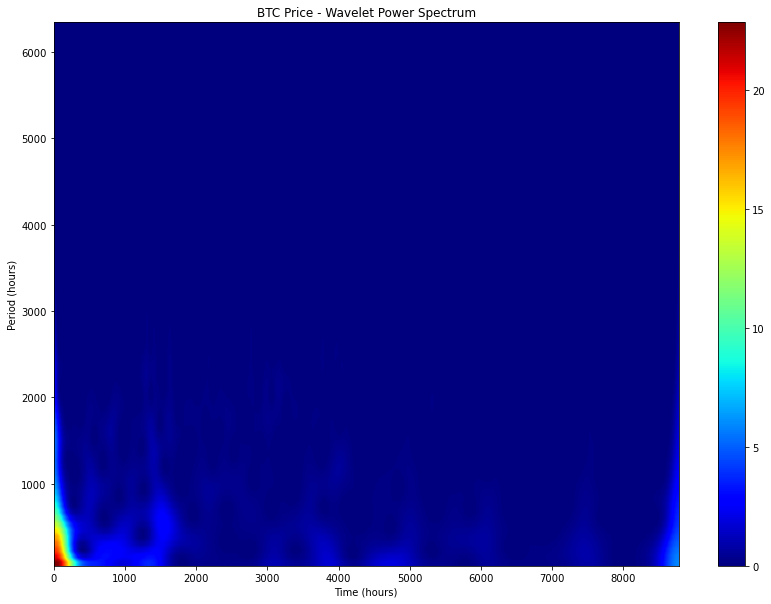

In [32]:


import numpy as np
import matplotlib.pyplot as plt
import pycwt as wavelet

# Prepare the data
# We will use the closing price for our analysis
price = price_feed1['close'].values
time = np.arange(len(price))

# We will assume that we have one observation per day
dt = 24.0 

# We subtract the mean and divide by the standard deviation to normalize the data
std = price.std()  
mean = price.mean()
price = (price - mean) / std

# The following parameters are defined for the wavelet analysis
mother = wavelet.Morlet(6)  # Morlet mother wavelet with m=6
s0 = 2 * dt  # Starting scale, in this case 2 days
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha = 0.0  # Lag-1 autocorrelation for white noise

# Perform the wavelet transform
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(price, dt, dj, s0, J, mother)
power = (np.abs(wave)) ** 2
fft_power = np.abs(fft) ** 2
period = 1 / freqs

# Plot the results
plt.figure(figsize=(14, 10))
plt.imshow(power, extent=[0, max(time), min(period), max(period)], aspect='auto', cmap='jet')
plt.colorbar()
plt.title('BTC Price - Wavelet Power Spectrum')
plt.xlabel('Time (hours)')
plt.ylabel('Period (hours)')
plt.show()
